# Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_color_codes()
pd.pandas.set_option('display.max_columns', None)

# Loading Dataset

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Understanding the Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [8]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


# Duplicates

In [9]:
duplicate = df[df.duplicated(keep = False)]
print(duplicate.shape)

(0, 5)


# Remove CustomerID

In [10]:
df.drop(["CustomerID"], axis = 1, inplace=True)

# Visualization

Text(0.5, 1.0, 'Count plot of Gender')

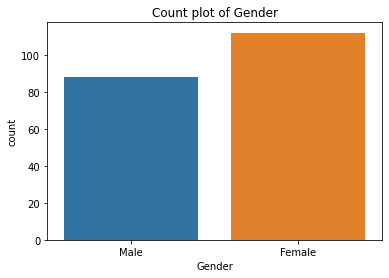

In [11]:
sns.countplot(x = 'Gender', data = df)
plt.title('Count plot of Gender', fontsize = 12)

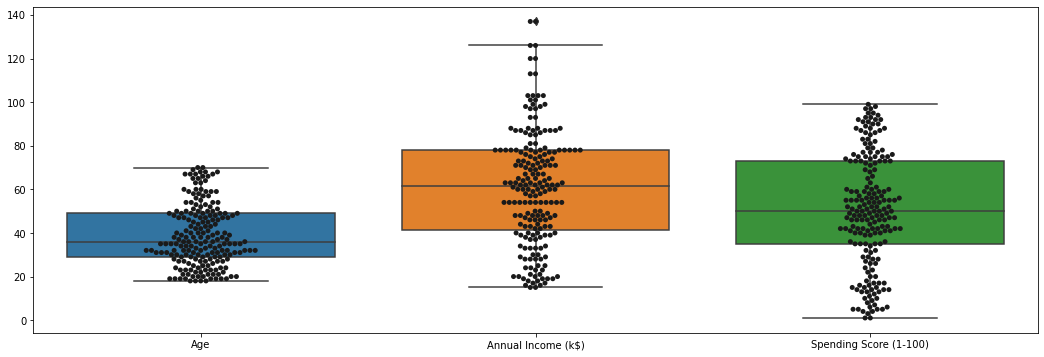

In [25]:
plt.figure(figsize=(18,6))
ax = sns.boxplot(data=df)
ax = sns.swarmplot(data=df, color=".1")

<Figure size 288x432 with 0 Axes>

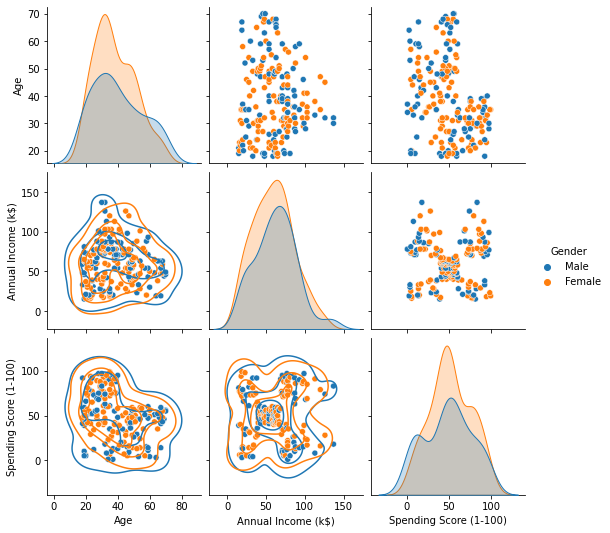

In [29]:
plt.figure(figsize=(4,6))
g = sns.pairplot(df, diag_kind="kde", hue = 'Gender')
g.map_lower(sns.kdeplot, levels=4, color=".2")

In [31]:
from sklearn.manifold import TSNE

cdf = df.drop(['Gender'], axis=1)

tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
data_tsne = tsne.fit_transform(cdf)

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=cdf.index)
dff = pd.concat([df, df_tsne], axis=1)

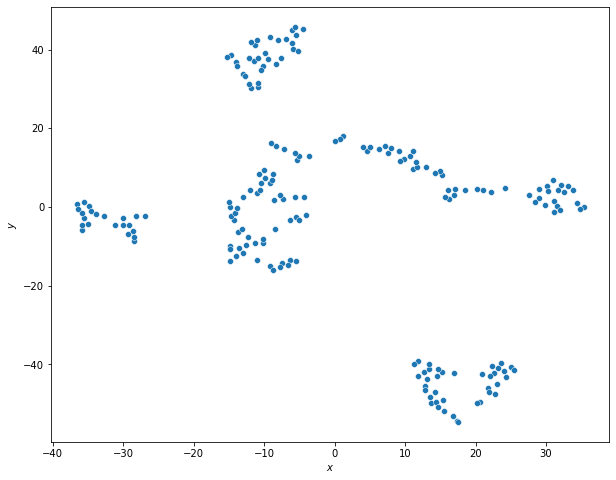

In [37]:
# Show the diagram
fig, ax = plt.subplots(figsize=(10, 8))

with sns.plotting_context("notebook", font_scale=1.5):
    sns.scatterplot(x='x',
                    y='y',
                    sizes=(30, 400),
                    palette=sns.color_palette("husl", 2),
                    data=dff,
                    ax=ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

# K-means algorithm

In [38]:
from sklearn.cluster import KMeans

# Perform a K-Means clustering with K=2
km = KMeans(n_clusters=2, max_iter=1000, random_state=1000)
Y_pred = km.fit_predict(cdf)

df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
kmdff = pd.concat([dff, df_km], axis=1)

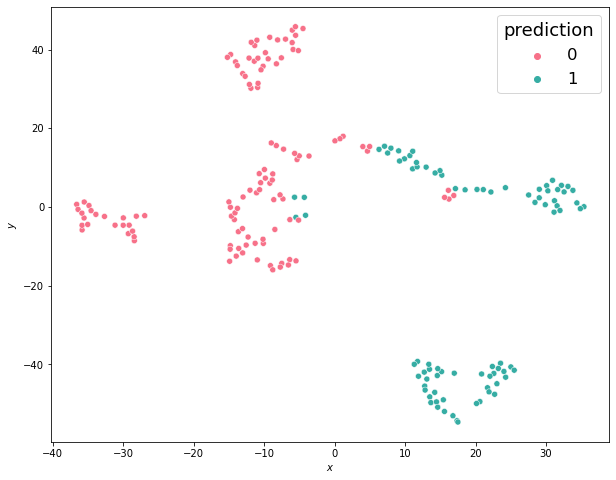

In [41]:
# Show the clustering result
fig, ax = plt.subplots(figsize=(10, 8))

with sns.plotting_context("notebook", font_scale=1.5):
    sns.scatterplot(x='x',
                    y='y',
                    hue='prediction',
                    sizes=(30, 400),
                    palette=sns.color_palette("husl", 2),
                    data=kmdff,
                    ax=ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

Inertia as a function of the number of clusers

In [42]:
# Compute the inertia
inertias = []

for i in range(2, 25):
    km = KMeans(n_clusters=i, max_iter=1000, random_state=1000)
    km.fit(cdf)
    inertias.append(km.inertia_)

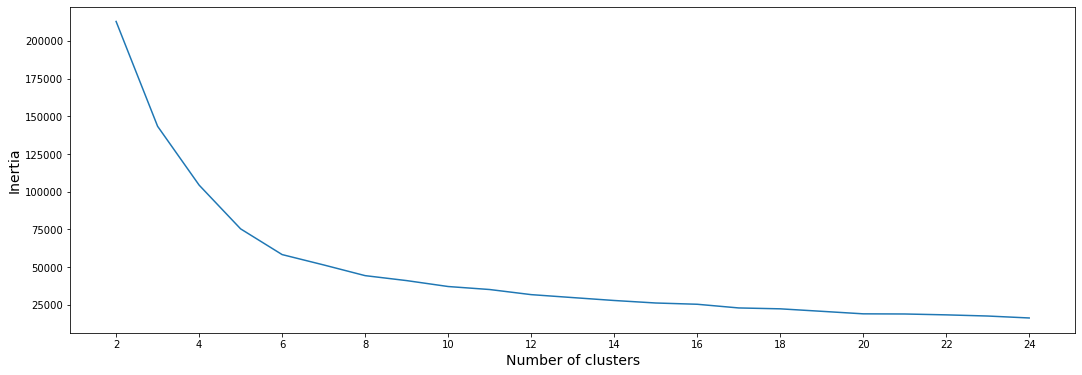

In [45]:
# Show the plot inertia vs. no. clusters
fig, ax = plt.subplots(figsize=(18, 6))

ax.plot(np.arange(2, 25, 1), inertias)
ax.set_xlabel('Number of clusters', fontsize=14)
ax.set_ylabel('Inertia', fontsize=14)
ax.set_xticks(np.arange(2, 25, 2))

plt.show()

In [51]:
# Perform a K-Means clustering with K=6
km = KMeans(n_clusters=6, max_iter=10000, random_state=1000)
Y_pred = km.fit_predict(cdf)

df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
kmdff = pd.concat([dff, df_km], axis=1)

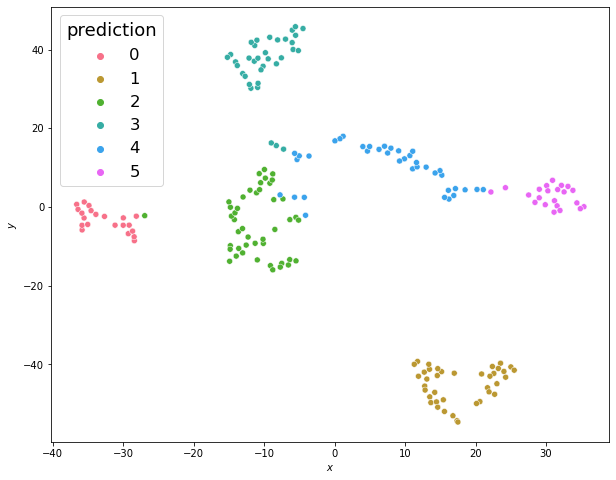

In [56]:
# Show the clustering result
fig, ax = plt.subplots(figsize=(10, 8))

with sns.plotting_context("notebook", font_scale=1.5):
    sns.scatterplot(x='x',
                    y='y',
                    hue='prediction',
                    sizes=(30, 400),
                    palette=sns.color_palette("husl", 6),
                    data=kmdff,
                    ax=ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

# Evaluation

## Silhouette plots

In [77]:
nb_clusters = [2, 4, 6, 8]
mapping = [(0, 0), (0, 1), (1, 0), (1, 1)]

In [75]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

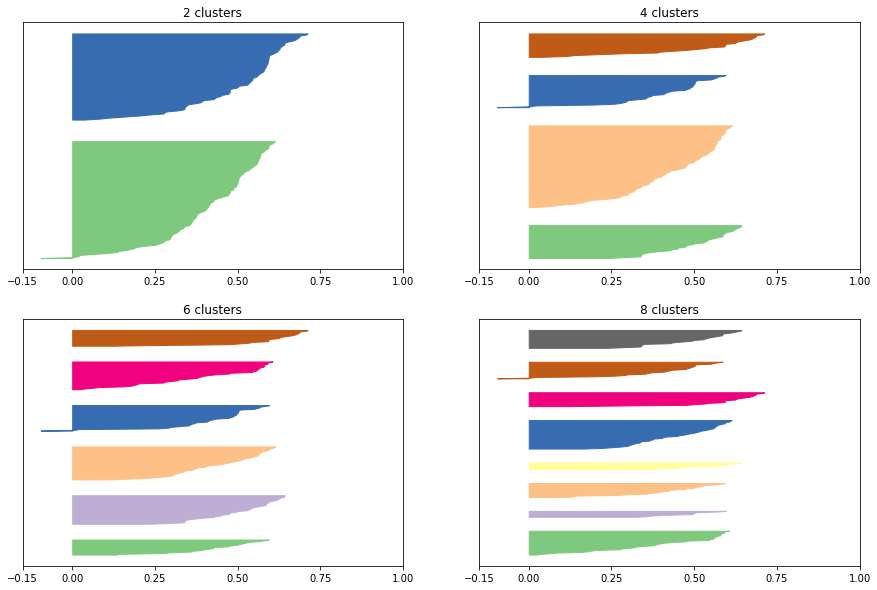

In [78]:
# Show the silhouette plots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

for i, n in enumerate(nb_clusters):
    km = KMeans(n_clusters=n, random_state=1000)
    Y = km.fit_predict(cdf)
    df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
    kmdff = pd.concat([dff, df_km], axis=1)

    silhouette_values = silhouette_samples(cdf, kmdff['prediction'])

    ax[mapping[i]].set_xticks([-0.15, 0.0, 0.25, 0.5, 0.75, 1.0])
    ax[mapping[i]].set_yticks([])
    ax[mapping[i]].set_title('%d clusters' % n)
    ax[mapping[i]].set_xlim([-0.15, 1])
    y_lower = 20
    
    for t in range(n):
        ct_values = silhouette_values[Y == t]
        ct_values.sort()

        y_upper = y_lower + ct_values.shape[0]

        color = cm.Accent(float(t) / n)
        ax[mapping[i]].fill_betweenx(np.arange(y_lower, y_upper), 0, ct_values, facecolor=color, edgecolor=color)

        y_lower = y_upper + 20

plt.show()    

# K-Prototype

In [57]:
df_values = df.values

In [58]:
df_values

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40],
       ['Female', 22, 17, 76],
       ['Female', 35, 18, 6],
       ['Female', 23, 18, 94],
       ['Male', 64, 19, 3],
       ['Female', 30, 19, 72],
       ['Male', 67, 19, 14],
       ['Female', 35, 19, 99],
       ['Female', 58, 20, 15],
       ['Female', 24, 20, 77],
       ['Male', 37, 20, 13],
       ['Male', 22, 20, 79],
       ['Female', 35, 21, 35],
       ['Male', 20, 21, 66],
       ['Male', 52, 23, 29],
       ['Female', 35, 23, 98],
       ['Male', 35, 24, 35],
       ['Male', 25, 24, 73],
       ['Female', 46, 25, 5],
       ['Male', 31, 25, 73],
       ['Female', 54, 28, 14],
       ['Male', 29, 28, 82],
       ['Female', 45, 28, 32],
       ['Male', 35, 28, 61],
       ['Female', 40, 29, 31],
       ['Female', 23, 29, 87],
       ['Male', 60, 30, 4],
       ['Female', 21, 30, 73],
       ['Male', 53, 33, 4],
       ['Male

In [63]:
from kmodes.kprototypes import KPrototypes


kproto = KPrototypes(n_clusters=6, verbose=2,max_iter=1000)
clusters = kproto.fit_predict(df_values, categorical=[0])

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/1000, moves: 52, ncost: 75449.66837065479
Run: 1, iteration: 2/1000, moves: 18, ncost: 71141.00799024993
Run: 1, iteration: 3/1000, moves: 8, ncost: 69700.15706990902
Run: 1, iteration: 4/1000, moves: 5, ncost: 69420.36195460545
Run: 1, iteration: 5/1000, moves: 0, ncost: 69420.36195460545
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/1000, moves: 43, ncost: 76971.85276324674
Run: 2, iteration: 2/1000, moves: 27, ncost: 66318.78139194469
Run: 2, iteration: 3/1000, moves: 23, ncost: 59575.752336492034
Run: 2, iteration: 4/1000, moves: 6, ncost: 59313.24990793457
Run: 2, iteration: 5/1000, moves: 0, ncost: 59313.24990793457
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/1000, moves: 89, ncost: 81495.0958228877
Run: 3, iteration: 2/1000, moves: 24, ncost: 70622.16166464917
Run: 3, i

In [64]:
print(kproto.cluster_centroids_)

[['56.34090909090909' '53.70454545454545' '49.38636363636363' 'Female']
 ['41.68571428571428' '88.22857142857143' '17.285714285714285' 'Male']
 ['27.0' '56.6578947368421' '49.13157894736842' 'Female']
 ['32.69230769230769' '86.53846153846153' '82.12820512820512' 'Female']
 ['25.272727272727273' '25.727272727272727' '79.36363636363636' 'Female']
 ['44.31818181818182' '25.772727272727273' '20.272727272727273' 'Female']]


In [65]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [66]:
df['cluster']=cluster_dict

In [67]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,5
1,Male,21,15,81,4
2,Female,20,16,6,5
3,Female,23,16,77,4
4,Female,31,17,40,5
...,...,...,...,...,...
195,Female,35,120,79,3
196,Female,45,126,28,1
197,Male,32,126,74,3
198,Male,32,137,18,1


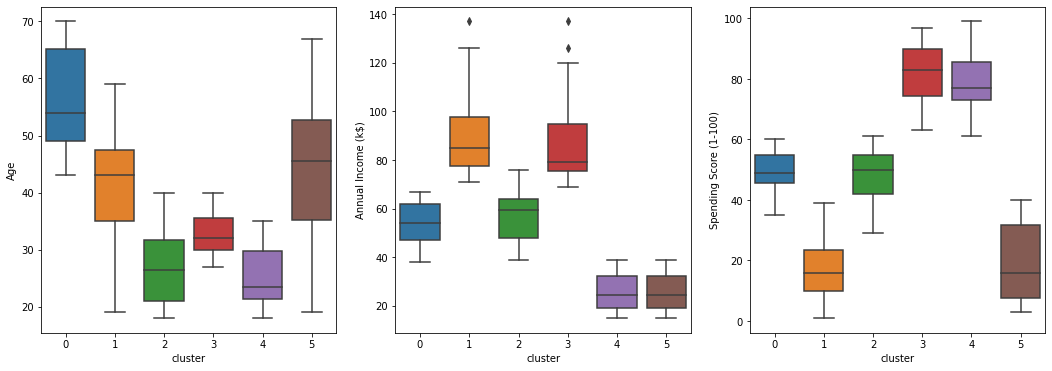

In [84]:
plt.figure(figsize=(18,6))
i=1
for col in df.columns[1:-1]:
    plt.subplot(1,3,i)
    sns.boxplot(x = 'cluster', y = col, data = df)
    i+=1